In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np 
import os 
import pandas as pd 
import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df=pd.read_csv('raw_sample.csv')
df.head()

,user,time_stamp,adgroup_id,pid,nonclk,clk
0,581738,1494137644,1,430548_1007,1,0
1,449818,1494638778,3,430548_1007,1,0
2,914836,1494650879,4,430548_1007,1,0
3,914836,1494651029,5,430548_1007,1,0
4,399907,1494302958,8,430548_1007,1,0


In [3]:
df.info()#checking the data type of the features 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26557961 entries, 0 to 26557960
Data columns (total 6 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   user        int64 
 1   time_stamp  int64 
 2   adgroup_id  int64 
 3   pid         object
 4   nonclk      int64 
 5   clk         int64 
dtypes: int64(5), object(1)
memory usage: 1.2+ GB


In [4]:
df = df.rename(columns={'user': 'userid'})
df.head()

,userid,time_stamp,adgroup_id,pid,nonclk,clk
0,581738,1494137644,1,430548_1007,1,0
1,449818,1494638778,3,430548_1007,1,0
2,914836,1494650879,4,430548_1007,1,0
3,914836,1494651029,5,430548_1007,1,0
4,399907,1494302958,8,430548_1007,1,0


In [5]:
#dropping duplicate values
df=df.drop_duplicates()
df.head()

,userid,time_stamp,adgroup_id,pid,nonclk,clk
0,581738,1494137644,1,430548_1007,1,0
1,449818,1494638778,3,430548_1007,1,0
2,914836,1494650879,4,430548_1007,1,0
3,914836,1494651029,5,430548_1007,1,0
4,399907,1494302958,8,430548_1007,1,0


In [6]:
df.isnull()#finding null or missing values

,userid,time_stamp,adgroup_id,pid,nonclk,clk
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
26557956,False,False,False,False,False,False
26557957,False,False,False,False,False,False
26557958,False,False,False,False,False,False
26557959,False,False,False,False,False,False


In [7]:
df=df.dropna()#dropping null values
df

,userid,time_stamp,adgroup_id,pid,nonclk,clk
0,581738,1494137644,1,430548_1007,1,0
1,449818,1494638778,3,430548_1007,1,0
2,914836,1494650879,4,430548_1007,1,0
3,914836,1494651029,5,430548_1007,1,0
4,399907,1494302958,8,430548_1007,1,0
...,...,...,...,...,...,...
26557956,6834,1494139949,846808,430548_1007,1,0
26557957,16815,1494328475,846808,430548_1007,1,0
26557958,736609,1494597871,846809,430548_1007,1,0
26557959,735781,1494684550,846809,430539_1007,1,0


In [8]:
df=df.drop(['nonclk'],axis=1)
df

,userid,time_stamp,adgroup_id,pid,clk
0,581738,1494137644,1,430548_1007,0
1,449818,1494638778,3,430548_1007,0
2,914836,1494650879,4,430548_1007,0
3,914836,1494651029,5,430548_1007,0
4,399907,1494302958,8,430548_1007,0
...,...,...,...,...,...
26557956,6834,1494139949,846808,430548_1007,0
26557957,16815,1494328475,846808,430548_1007,0
26557958,736609,1494597871,846809,430548_1007,0
26557959,735781,1494684550,846809,430539_1007,0


In [9]:
#converting the timestamp into human readable form and binning it into morning ,afternoon and evening
df['date_time'] = pd.to_datetime(df['time_stamp'], unit='s')
def time_bin(datetime_value):
    if datetime_value.hour >= 6 and datetime_value.hour < 12:
        return 'Morning'
    elif datetime_value.hour >= 12 and datetime_value.hour < 18:
        return 'Afternoon'
    else:
        return 'Evening'
df['time_bin'] = df['date_time'].apply(time_bin)
print(df)

          userid  time_stamp  adgroup_id          pid  clk  \
0         581738  1494137644           1  430548_1007    0   
1         449818  1494638778           3  430548_1007    0   
2         914836  1494650879           4  430548_1007    0   
3         914836  1494651029           5  430548_1007    0   
4         399907  1494302958           8  430548_1007    0   
...          ...         ...         ...          ...  ...   
26557956    6834  1494139949      846808  430548_1007    0   
26557957   16815  1494328475      846808  430548_1007    0   
26557958  736609  1494597871      846809  430548_1007    0   
26557959  735781  1494684550      846809  430539_1007    0   
26557960  735781  1494677729      846810  430539_1007    0   

                   date_time   time_bin  
0        2017-05-07 06:14:04    Morning  
1        2017-05-13 01:26:18    Evening  
2        2017-05-13 04:47:59    Evening  
3        2017-05-13 04:50:29    Evening  
4        2017-05-09 04:09:18    Evening  
...

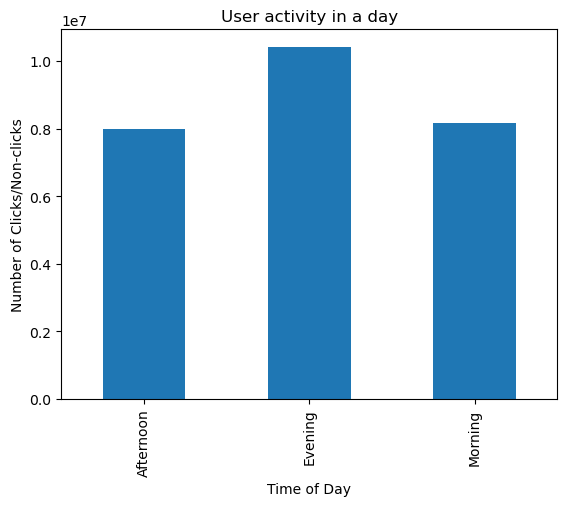

In [10]:
#visualizing the number of clicks in a day
clicks_by_time = df.groupby('time_bin')['clk'].count()
clicks_by_time.plot(kind='bar')
plt.title('User activity in a day')
plt.xlabel('Time of Day')
plt.ylabel('Number of Clicks/Non-clicks')
plt.show()

In [11]:
df.corr()

,userid,time_stamp,adgroup_id,clk
userid,1.000000,-0.001188,-0.017633,-0.000893
time_stamp,-0.001188,1.000000,0.053424,-0.002252
adgroup_id,-0.017633,0.053424,1.000000,0.003245
clk,-0.000893,-0.002252,0.003245,1.000000


In [15]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] 
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) // nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad =1.0, h_pad = 1.0)
    plt.show()

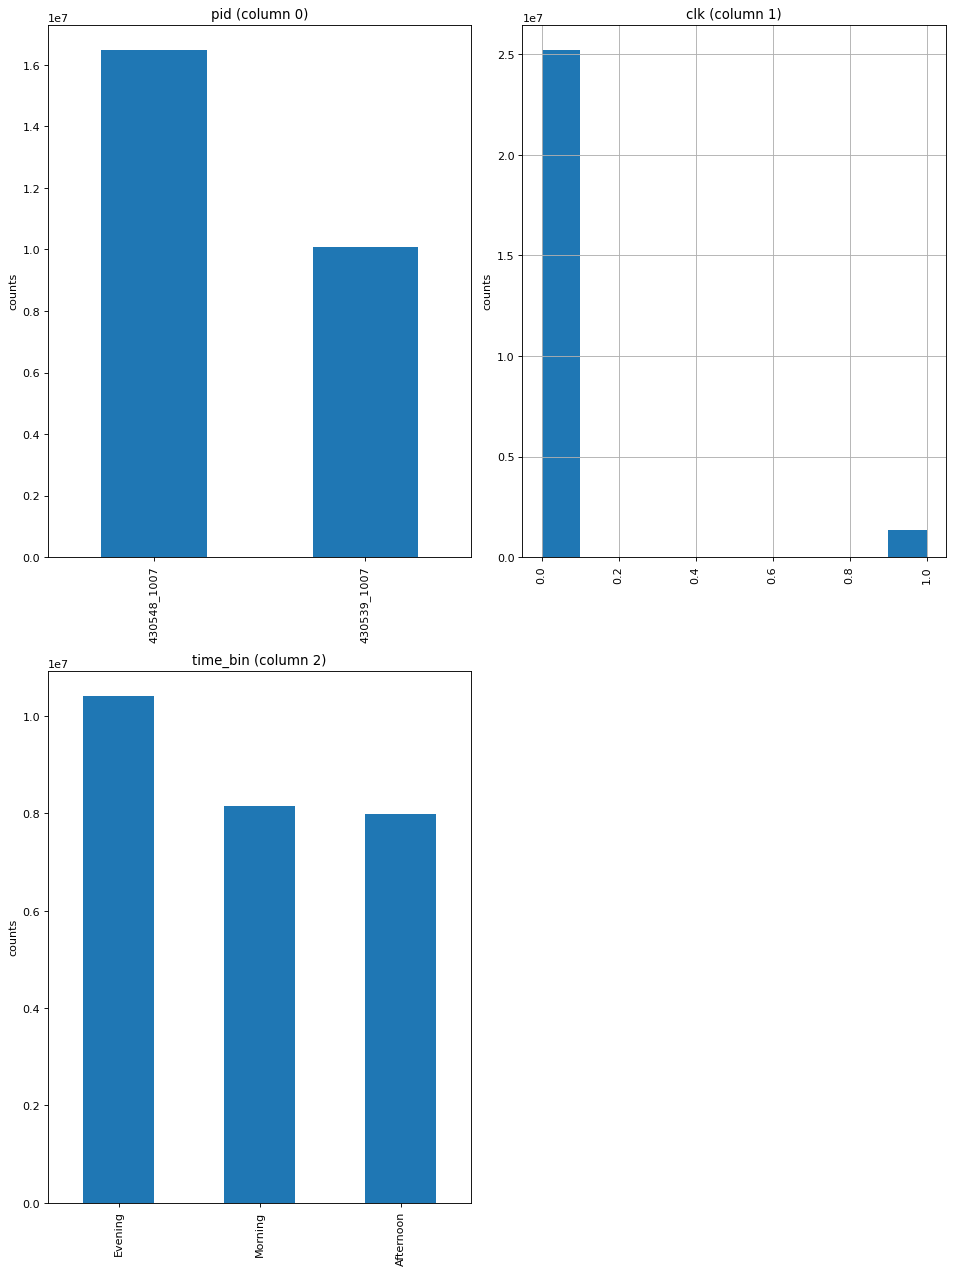

In [16]:
plotPerColumnDistribution(df, 12,2)

In [17]:
df1=pd.read_csv('ad_feature.csv')
df1

,adgroup_id,cate_id,campaign_id,customer,brand,price
0,63133,6406,83237,1,95471.0,170.00
1,313401,6406,83237,1,87331.0,199.00
2,248909,392,83237,1,32233.0,38.00
3,208458,392,83237,1,174374.0,139.00
4,110847,7211,135256,2,145952.0,32.99
...,...,...,...,...,...,...
846806,824255,4526,380022,255868,389713.0,268.00
846807,790170,4280,379736,255872,322171.0,68.00
846808,845286,6261,379736,255872,322171.0,88.00
846809,824732,4520,379736,255872,322171.0,68.00


In [18]:
df1.info()#checking the data type of the features 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846811 entries, 0 to 846810
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   adgroup_id   846811 non-null  int64  
 1   cate_id      846811 non-null  int64  
 2   campaign_id  846811 non-null  int64  
 3   customer     846811 non-null  int64  
 4   brand        600481 non-null  float64
 5   price        846811 non-null  float64
dtypes: float64(2), int64(4)
memory usage: 38.8 MB


In [19]:
df1=df1.drop_duplicates()#dropping duplicate values
df1

,adgroup_id,cate_id,campaign_id,customer,brand,price
0,63133,6406,83237,1,95471.0,170.00
1,313401,6406,83237,1,87331.0,199.00
2,248909,392,83237,1,32233.0,38.00
3,208458,392,83237,1,174374.0,139.00
4,110847,7211,135256,2,145952.0,32.99
...,...,...,...,...,...,...
846806,824255,4526,380022,255868,389713.0,268.00
846807,790170,4280,379736,255872,322171.0,68.00
846808,845286,6261,379736,255872,322171.0,88.00
846809,824732,4520,379736,255872,322171.0,68.00


In [20]:
df1=df1.dropna()#dropping null values
df1

,adgroup_id,cate_id,campaign_id,customer,brand,price
0,63133,6406,83237,1,95471.0,170.00
1,313401,6406,83237,1,87331.0,199.00
2,248909,392,83237,1,32233.0,38.00
3,208458,392,83237,1,174374.0,139.00
4,110847,7211,135256,2,145952.0,32.99
...,...,...,...,...,...,...
846806,824255,4526,380022,255868,389713.0,268.00
846807,790170,4280,379736,255872,322171.0,68.00
846808,845286,6261,379736,255872,322171.0,88.00
846809,824732,4520,379736,255872,322171.0,68.00


In [21]:
df1.corr()#finding correlation between the features

,adgroup_id,cate_id,campaign_id,customer,brand,price
adgroup_id,1.000000,-0.105597,0.125487,0.126273,-0.030451,-0.002370
cate_id,-0.105597,1.000000,-0.002771,0.009446,0.044044,-0.006287
campaign_id,0.125487,-0.002771,1.000000,0.107787,0.012787,-0.000390
customer,0.126273,0.009446,0.107787,1.000000,0.030091,-0.002082
brand,-0.030451,0.044044,0.012787,0.030091,1.000000,0.002330
price,-0.002370,-0.006287,-0.000390,-0.002082,0.002330,1.000000


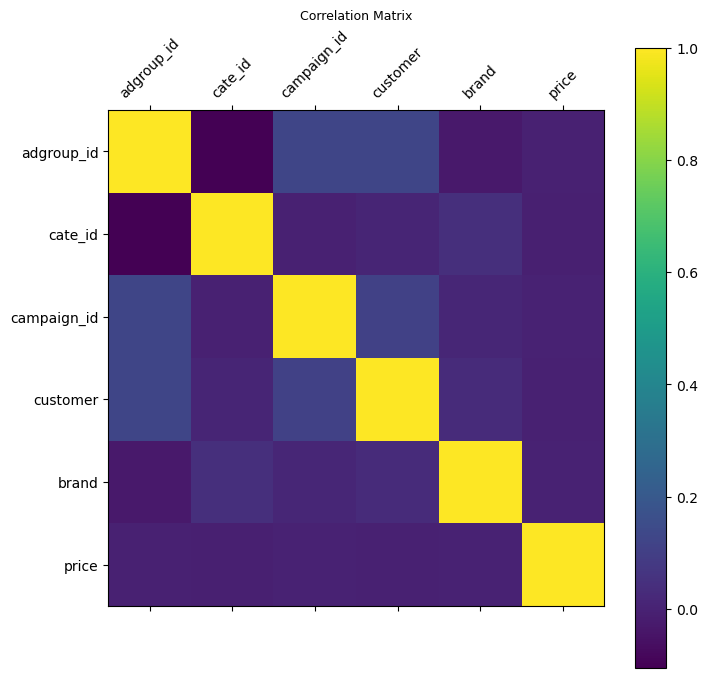

In [22]:
f = plt.figure(figsize=(8, 8))#plotting the correlation matrix
plt.matshow(df1.corr(), fignum=f.number)
plt.xticks(range(df1.select_dtypes(['number']).shape[1]), df1.select_dtypes(['number']).columns, fontsize=10, rotation=45)
plt.yticks(range(df1.select_dtypes(['number']).shape[1]), df1.select_dtypes(['number']).columns, fontsize=10)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=10)
plt.title('Correlation Matrix', fontsize=9);

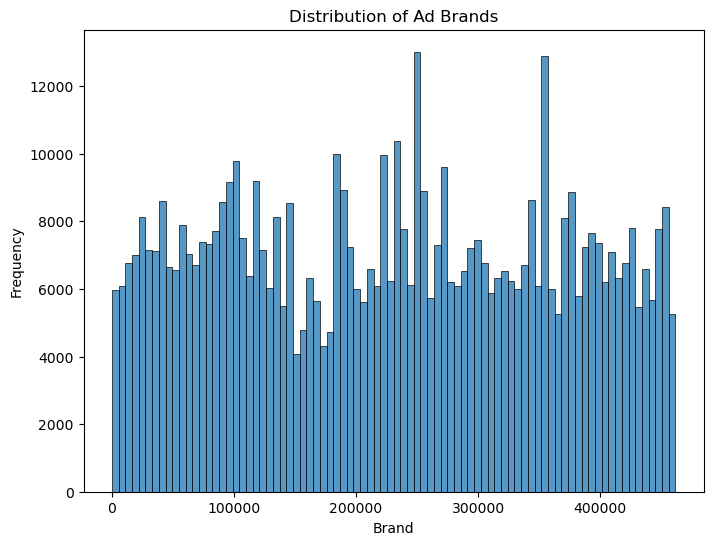

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt



# Create a distribution plot for the brand column
plt.figure(figsize=(8, 6))
sns.histplot(df1["brand"])
plt.title("Distribution of Ad Brands")
plt.xlabel("Brand")
plt.ylabel("Frequency")
plt.show()


In [30]:
df2=pd.read_csv('user_profile.csv')
df2

,userid,cms_segid,cms_group_id,final_gender_code,age_level,pvalue_level,shopping_level,occupation,new_user_class_level
0,234,0,5,2,5,NaN,3,0,3.0
1,523,5,2,2,2,1.0,3,1,2.0
2,612,0,8,1,2,2.0,3,0,NaN
3,1670,0,4,2,4,NaN,1,0,NaN
4,2545,0,10,1,4,NaN,3,0,NaN
...,...,...,...,...,...,...,...,...,...
1061763,1137955,0,3,2,3,NaN,3,0,4.0
1061764,1138545,0,4,2,4,NaN,3,0,3.0
1061765,1138902,67,9,1,3,2.0,3,0,4.0
1061766,1139632,0,7,1,1,NaN,1,0,NaN


In [31]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061768 entries, 0 to 1061767
Data columns (total 9 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   userid                 1061768 non-null  int64  
 1   cms_segid              1061768 non-null  int64  
 2   cms_group_id           1061768 non-null  int64  
 3   final_gender_code      1061768 non-null  int64  
 4   age_level              1061768 non-null  int64  
 5   pvalue_level           485851 non-null   float64
 6   shopping_level         1061768 non-null  int64  
 7   occupation             1061768 non-null  int64  
 8   new_user_class_level   716848 non-null   float64
dtypes: float64(2), int64(7)
memory usage: 72.9 MB


In [33]:
df2=df2.drop_duplicates()

In [34]:
df2.isnull()

,userid,cms_segid,cms_group_id,final_gender_code,age_level,pvalue_level,shopping_level,occupation,new_user_class_level
0,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,True,False,False,True
4,False,False,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...
1061763,False,False,False,False,False,True,False,False,False
1061764,False,False,False,False,False,True,False,False,False
1061765,False,False,False,False,False,False,False,False,False
1061766,False,False,False,False,False,True,False,False,True


In [35]:
df2=df2.dropna()
df2

,userid,cms_segid,cms_group_id,final_gender_code,age_level,pvalue_level,shopping_level,occupation,new_user_class_level
1,523,5,2,2,2,1.0,3,1,2.0
5,3644,49,6,2,6,2.0,3,0,2.0
6,5777,44,5,2,5,2.0,3,0,2.0
8,6355,2,1,2,1,1.0,3,0,4.0
9,6823,43,5,2,5,2.0,3,0,1.0
...,...,...,...,...,...,...,...,...,...
1061754,1134431,5,2,2,2,2.0,3,1,2.0
1061759,1136629,78,10,1,4,1.0,3,0,4.0
1061760,1137304,19,3,2,3,2.0,3,0,2.0
1061765,1138902,67,9,1,3,2.0,3,0,4.0


In [36]:
df2.corr()

,userid,cms_segid,cms_group_id,final_gender_code,age_level,pvalue_level,shopping_level,occupation,new_user_class_level
userid,1.000000,0.073793,0.066296,-0.045031,0.067958,0.087446,0.018240,-0.041395,-0.045730
cms_segid,0.073793,1.000000,0.985322,-0.858880,0.560449,0.225989,-0.052068,-0.194460,0.025054
cms_group_id,0.066296,0.985322,1.000000,-0.925088,0.441794,0.169767,-0.098823,-0.138921,0.016224
final_gender_code,-0.045031,-0.858880,-0.925088,1.000000,-0.068934,-0.088170,0.092535,0.030520,-0.019687
age_level,0.067958,0.560449,0.441794,-0.068934,1.000000,0.238711,-0.041377,-0.294462,-0.003941
pvalue_level,0.087446,0.225989,0.169767,-0.088170,0.238711,1.000000,0.035840,-0.094152,-0.108329
shopping_level,0.018240,-0.052068,-0.098823,0.092535,-0.041377,0.035840,1.000000,0.038233,-0.063166
occupation,-0.041395,-0.194460,-0.138921,0.030520,-0.294462,-0.094152,0.038233,1.000000,-0.037283
new_user_class_level,-0.045730,0.025054,0.016224,-0.019687,-0.003941,-0.108329,-0.063166,-0.037283,1.000000


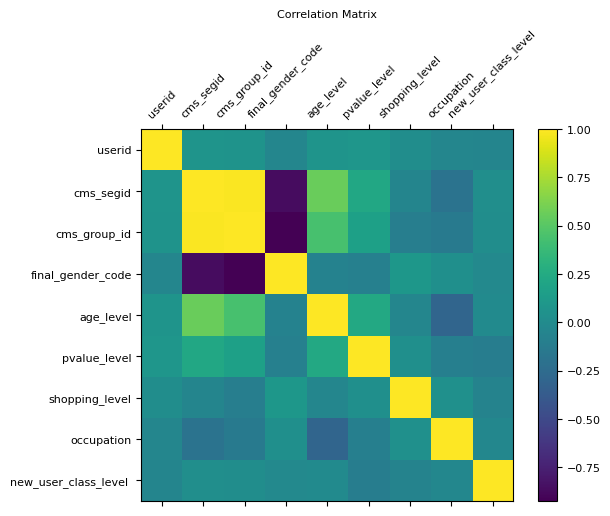

In [37]:
f = plt.figure()
plt.matshow(df2.corr(), fignum=f.number)
plt.xticks(range(df2.select_dtypes(['number']).shape[1]), df2.select_dtypes(['number']).columns, fontsize=8, rotation=45)
plt.yticks(range(df2.select_dtypes(['number']).shape[1]), df2.select_dtypes(['number']).columns, fontsize=8)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=8)
plt.title('Correlation Matrix', fontsize=8);

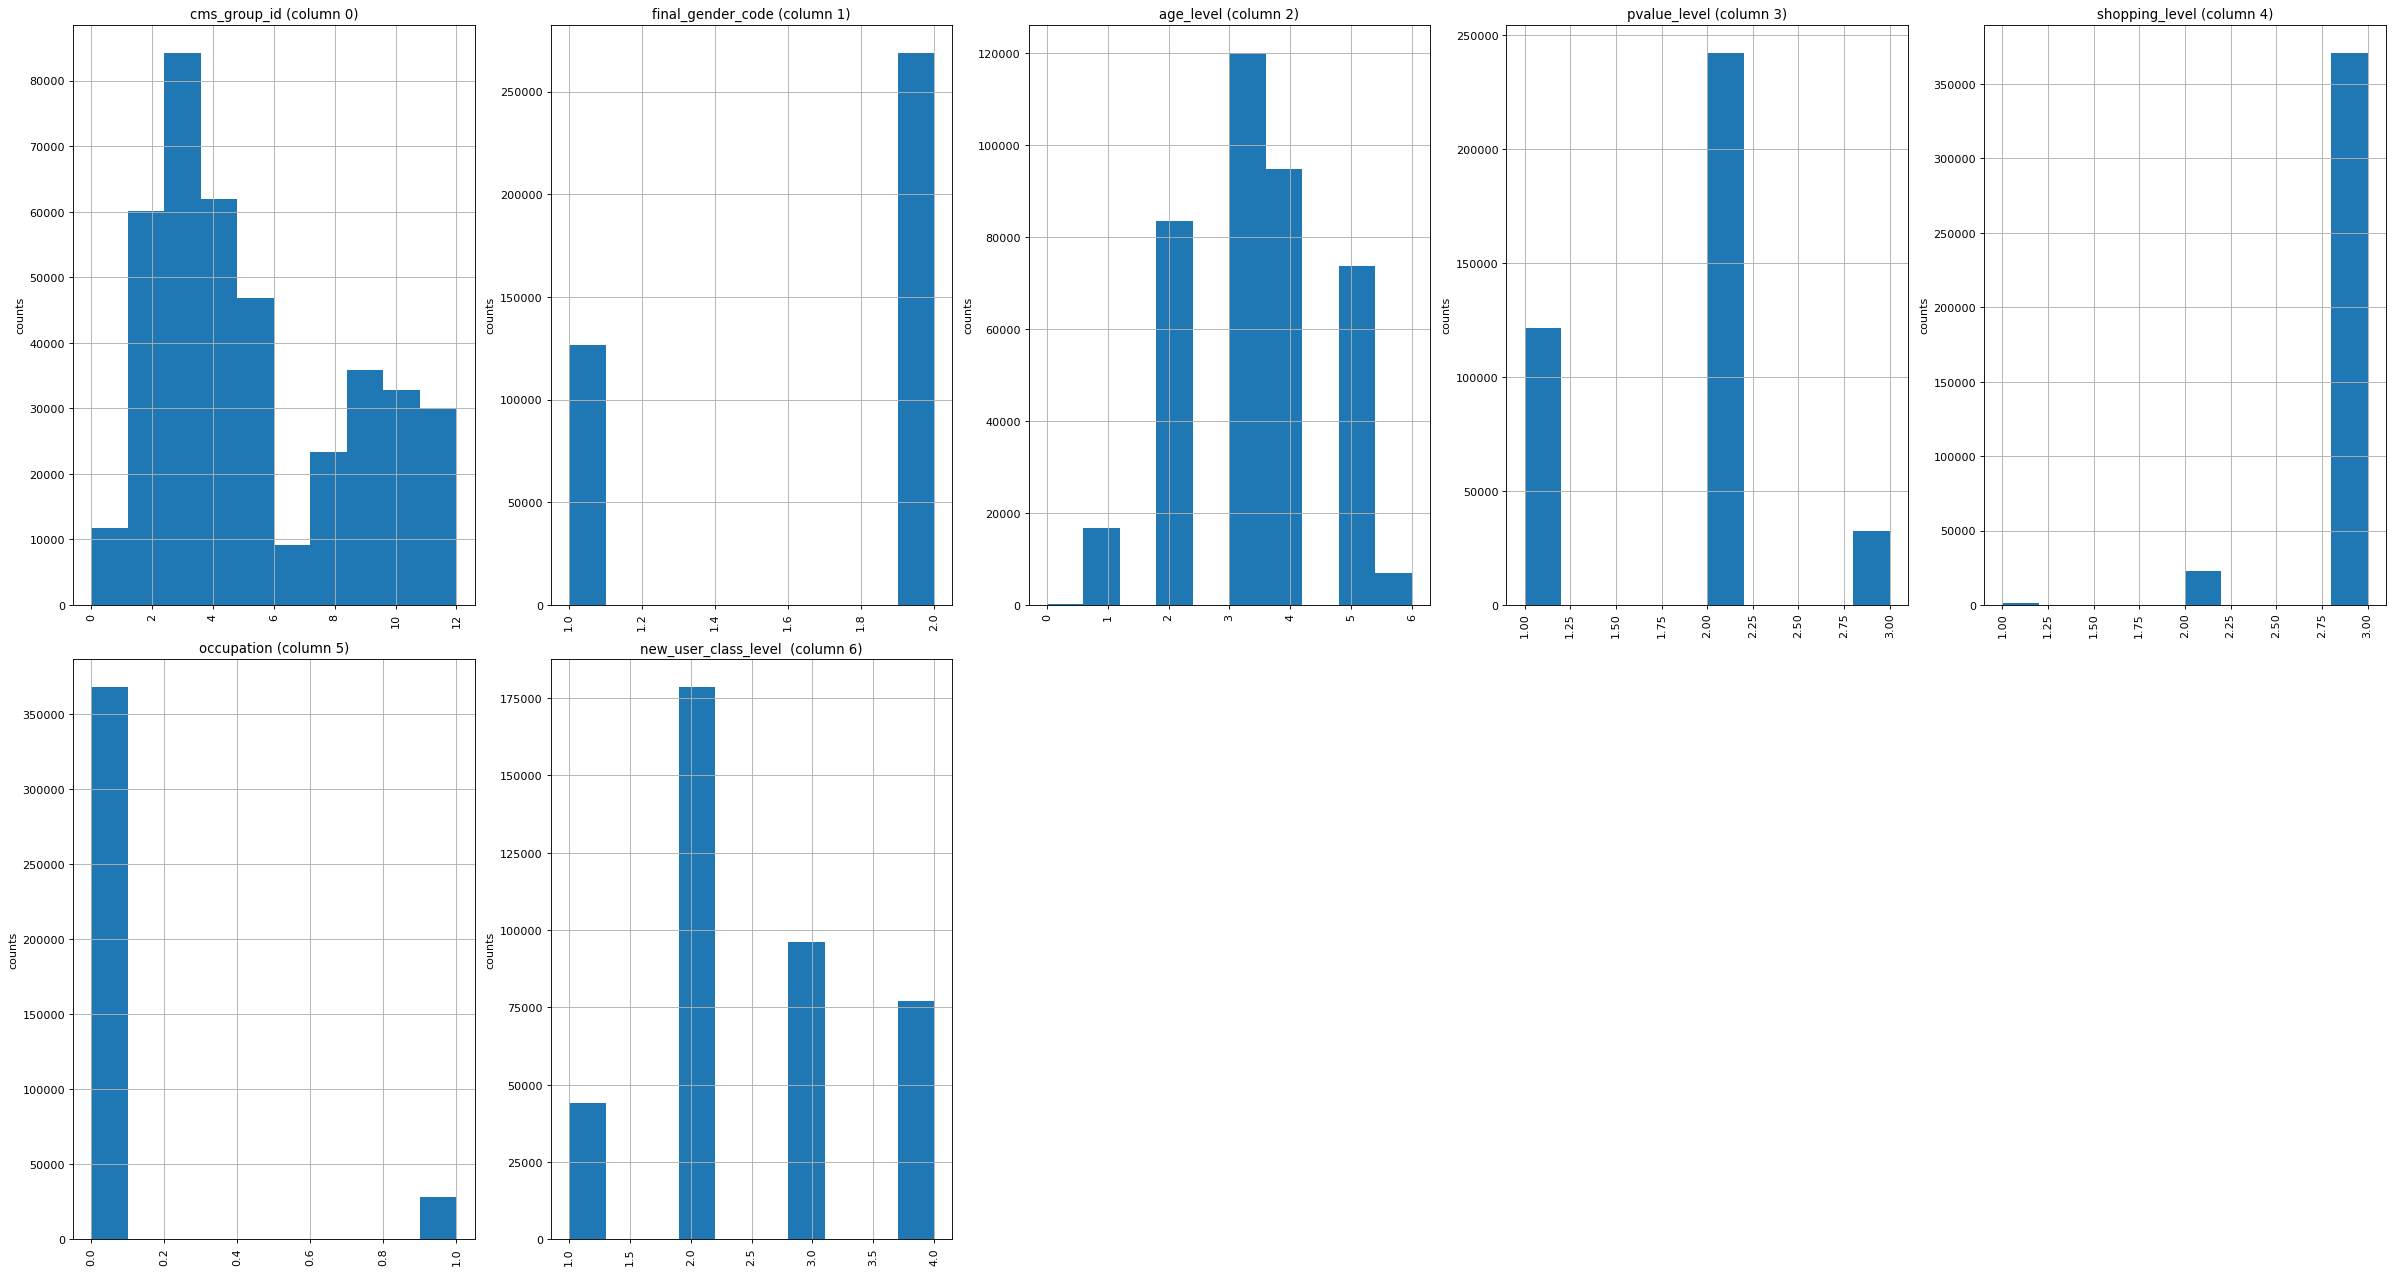

In [38]:
plotPerColumnDistribution(df2, 10,5)

In [39]:
merged = df.merge(df1, on='adgroup_id')

# Merge user_profile dataset on userid
merged = merged.merge( df2, on='userid')

# Print the merged dataset
print(merged.head())

   userid  time_stamp  adgroup_id          pid  clk           date_time  \
0  117840  1494036743          11  430548_1007    0 2017-05-06 02:12:23   
1  117840  1494036743      383047  430548_1007    0 2017-05-06 02:12:23   
2  623911  1494625301          11  430548_1007    0 2017-05-12 21:41:41   
3  623911  1494451608          11  430548_1007    0 2017-05-10 21:26:48   
4  623911  1494402884        9773  430548_1007    0 2017-05-10 07:54:44   

  time_bin  cate_id  campaign_id  customer     brand   price  cms_segid  \
0  Evening     5239       384809     25745  134255.0  176.00         49   
1  Evening      877       167349     92802  437357.0   25.00         49   
2  Evening     5239       384809     25745  134255.0  176.00         93   
3  Evening     5239       384809     25745  134255.0  176.00         93   
4  Morning     9300        20106     95928  384041.0   61.25         93   

   cms_group_id  final_gender_code  age_level  pvalue_level  shopping_level  \
0             6    

In [42]:
data=merged.drop(['pid','customer','time_stamp','date_time'],axis=1)
data=data.dropna()

In [43]:
# Encode categorical variables
label_encoder = LabelEncoder()
data['cms_group_id'] = label_encoder.fit_transform(data['cms_group_id'])
data['final_gender_code'] = label_encoder.fit_transform(data['final_gender_code'])
data['age_level'] = label_encoder.fit_transform(data['age_level'])
data['pvalue_level'] = label_encoder.fit_transform(data['pvalue_level'])
data['shopping_level'] = label_encoder.fit_transform(data['shopping_level'])
data['occupation'] = label_encoder.fit_transform(data['occupation'])
data['time_bin'] = label_encoder.fit_transform(data['time_bin'])

In [47]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

import xgboost as xgb

In [49]:
X = data.drop(columns=["clk"])
y = data["clk"]

In [50]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
# Define the hyperparameters to search
lr_params = {'C': [0.001, 0.01, 0.1, 1, 10]}
rf_params = {'n_estimators': [100, 200, 300], 'max_depth': [3, 5, 7]}
gb_params = {'n_estimators': [100, 200, 300], 'learning_rate': [0.01, 0.1, 1], 'max_depth': [3, 5, 7]}
xgb_params = {'n_estimators': [100, 200, 300], 'learning_rate': [0.01, 0.1, 1], 'max_depth': [3, 5, 7]}

In [53]:

# Define the models to search
models = [
    {'name': 'Logistic Regression', 'estimator': LogisticRegression(), 'params': lr_params},
    {'name': 'Random Forest', 'estimator': RandomForestClassifier(), 'params': rf_params},
    {'name': 'Gradient Boosting', 'estimator': GradientBoostingClassifier(), 'params': gb_params},
    {'name': 'XGBoost', 'estimator': xgb.XGBClassifier(), 'params': xgb_params},
]

In [ ]:
# Train and tune the models using GridSearchCV
best_model = None
best_score = 0
for model in models:
    print('Training', model['name'], '...')
    grid = GridSearchCV(model['estimator'], model['params'], cv=5, scoring='accuracy')
    grid.fit(X_train, y_train)
    print('Best parameters:', grid.best_params_)
    print('Best score:', grid.best_score_)
    if grid.best_score_ > best_score:
        best_model = grid.best_estimator_
        best_score = grid.best_score